In [3]:
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
from datetime import datetime
from datetime import timedelta
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

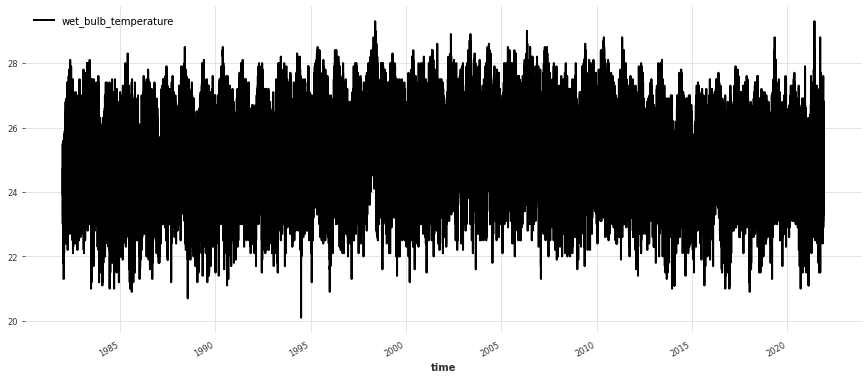

In [4]:
df = pd.read_csv("./data/wet-bulb-temperature-hourly.csv")
dt = [datetime.strptime(df.iloc[n,0], "%Y-%m-%d")+timedelta(hours=int(df.iloc[n,1])-1) for n in range(df.shape[0])]
df.index = dt
df.drop(["wbt_date","wbt_time"],axis=1,inplace=True)
series = TimeSeries.from_dataframe(df)
series.plot()

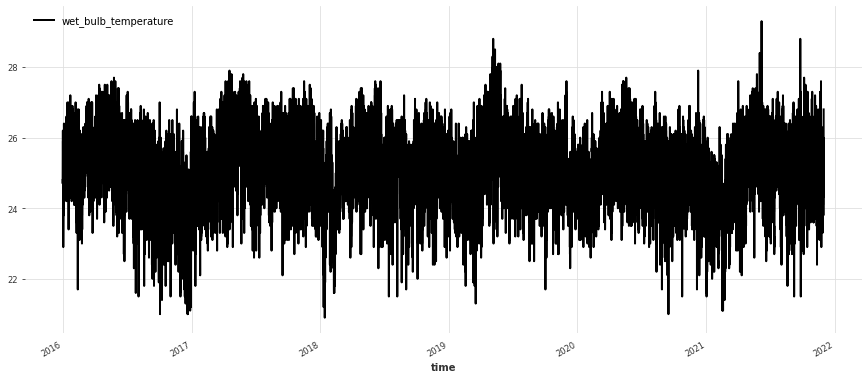

In [7]:
_, series = series.split_before(pd.Timestamp('20160101'))
series.plot()

In [8]:
train, val = series.split_before(pd.Timestamp('20200101'))

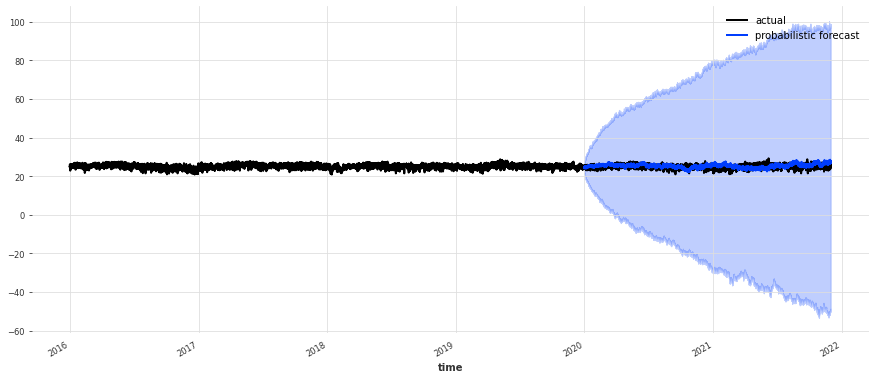

In [9]:
model_es = ExponentialSmoothing()
model_es.fit(train)
probabilistic_forecast = model_es.predict(len(val), num_samples=500)

series.plot(label='actual')
probabilistic_forecast.plot(label='probabilistic forecast')
plt.legend()
plt.show()

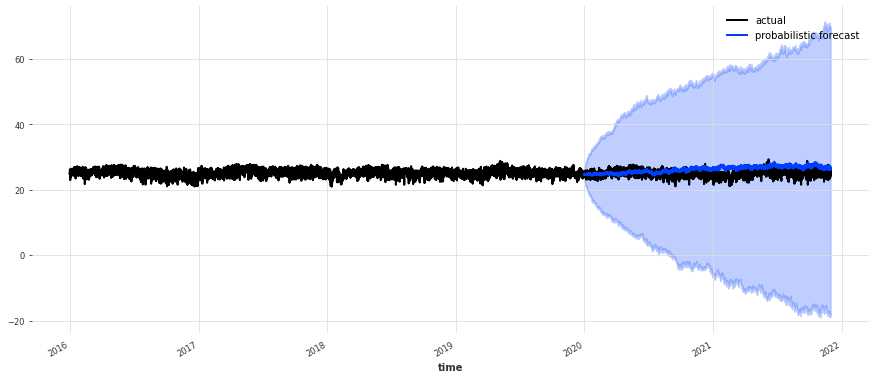

In [10]:
model_arima = ARIMA()
model_arima.fit(train)
probabilistic_forecast = model_arima.predict(len(val), num_samples=500)

series.plot(label='actual')
probabilistic_forecast.plot(label='probabilistic forecast')
plt.legend()
plt.show()

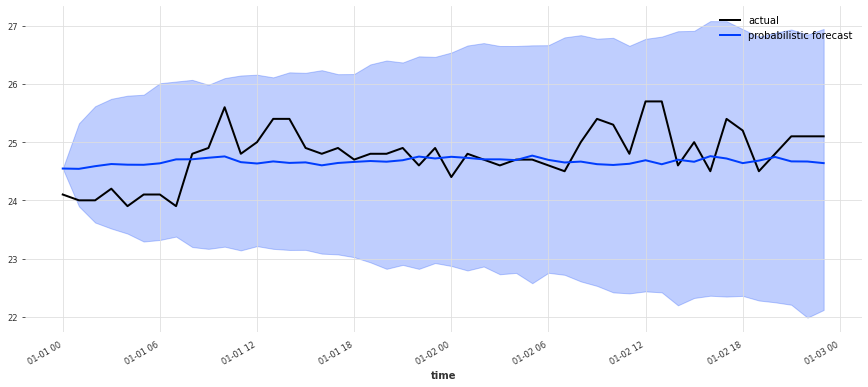

In [12]:
val[:48].plot(label='actual')
probabilistic_forecast[:48].plot(label='probabilistic forecast')
plt.legend()
plt.show()